In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading CSV Data

In [3]:
#Pick the csv file from google drive.
dataset = pd.read_csv('/content/drive/MyDrive/ml-project-ub/diabetes.csv')
dataset.shape

(768, 9)

In [4]:
#Some useful information about the dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Supervised Learning: Linear Regression By Gradient Descent

In [6]:
# Correlation Matrix of dataset and plotting it for visual representation.
correlation_matrix = dataset.corr()

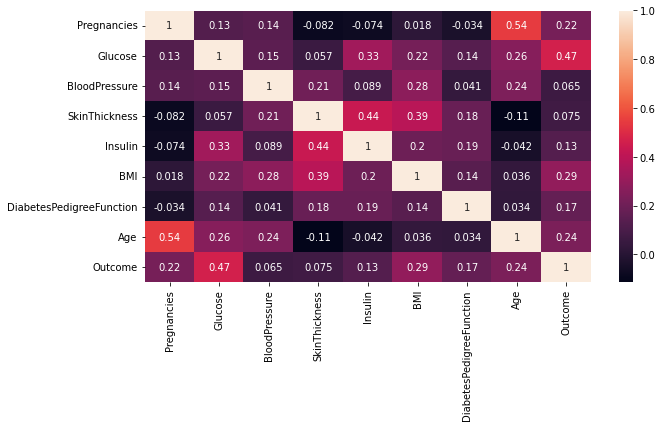

In [7]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [8]:
features = np.asmatrix(dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
features = scale(features)
target = np.asmatrix(dataset[['Outcome']])

print("Shape of feature matrix",features.shape)
print("Shape of Target matrix",target.shape)

Shape of feature matrix (768, 8)
Shape of Target matrix (768, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [9]:
# Spliting the dataset into train and test datasets. 80% of the dataset is used for training and 20% is used for testing. 
train_x, test_x, train_y, test_y = train_test_split(features,target, test_size=0.2,random_state=2)
validation_x, test_x, validation_y, test_y = train_test_split(features,target, test_size=0.25)

In [10]:
print('\nNumber of data points in the training dataset:', len(train_x))
print('\nNumber of data points in the test dataset:', len(test_x))
print('\nShape of the training dataset:', train_x.shape)
print('\nShape of the test dataset:', test_x.shape)
print('\n Training dataset type:', type(train_x))
print('\n Test dataset type:', type(test_x))


Number of data points in the training dataset: 614

Number of data points in the test dataset: 192

Shape of the training dataset: (614, 8)

Shape of the test dataset: (192, 8)

 Training dataset type: <class 'numpy.ndarray'>

 Test dataset type: <class 'numpy.ndarray'>


In Logistic Regression we use the the following formula to predict y.

Ypredicted=σ(Xw)=11+e−(Xw)

▽J(w)=XT(Ypredicted−Y)

So Using Gradient descent we are updating the weights by :

w=w−α▽J(w)

In [11]:
#Weight matrix initialisation
weights = np.asmatrix([0,0,0,0,0,0,0,0]).T
#Epochs
epochs = 10000
#Learning rate
alpha = 1e-8

In [12]:
for i in range(epochs):
  gradient = np.dot(train_x.transpose(),  ( (1/(1+np.exp(-np.dot(train_x, weights)))) - train_y))
  weights = weights - alpha * gradient

In [13]:
#weights

In [14]:
#Predication with training data
predictions = (1/(1+np.exp(-np.dot(train_x, weights))))
c=0
for i in range(len(predictions)):
  if (predictions[i]>=0.5 and train_y[i]==1) or (predictions[i]<0.5 and train_y[i]==0):
    c+=1

print('Accuracy of the prediction:', c/len(predictions))

Accuracy of the prediction: 0.7312703583061889


In [15]:
#Data validation
predictions = (1/(1+np.exp(-np.dot(validation_x, weights))))
c=0
for i in range(len(predictions)):
  if (predictions[i]>=0.5 and train_y[i]==1) or (predictions[i]<0.5 and train_y[i]==0):
    c+=1

print('Accuracy of the prediction:', c/len(predictions))

Accuracy of the prediction: 0.5208333333333334


In [16]:
#Prediction with test data
predictions = (1/(1+np.exp(-np.dot(test_x, weights))))
c=0
for i in range(len(predictions)):
  if (predictions[i]>=0.5 and test_y[i]==1) or (predictions[i]<0.5 and test_y[i]==0):
    c+=1

print('Accuracy of the prediction:', c/len(predictions))

Accuracy of the prediction: 0.75


# Neural Networks


In [17]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam


# This network has two hidden layers.

model = Sequential()

# L2 Regularisation

model.add(Dense(60, activation='relu', input_dim=8, kernel_regularizer='l2'))  # Hidden layer.
model.add(Dense(80, activation='relu')) # Hidden layer.
model.add(Dense(2, activation='softmax'))  # Output layer.


# L1 Regularisation. This will be commented from here and on, 'uncomment' as and when you need it.

# model.add(Dense(60, activation='relu', input_dim=8, kernel_regularizer='l1'))  # Hidden layer that uses L2 regularisation.
# model.add(Dense(80, activation='relu')) # Hidden layer.
# model.add(Dense(2, activation='softmax'))  # Output layer.

# Dropout regularisation. This will be commented from here and on, 'uncomment' as and when you need it.

# model.add(Dense(200, activation='relu', input_dim=8, kernel_regularizer='l2'))  # Hidden layer.
# model.add(Dropout(0.5))
# model.add(Dense(250, activation='relu')) # Hidden layer.
# model.add(Dropout(0.5))
# model.add(Dense(2, activation='softmax'))  # Output layer.



model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(train_x, to_categorical(train_y),validation_data=(validation_x, to_categorical(validation_y)), epochs=80, batch_size=64)


# Evaluating the model
loss, accuracy = model.evaluate(validation_x, to_categorical(validation_y))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                540       
                                                                 
 dense_1 (Dense)             (None, 80)                4880      
                                                                 
 dense_2 (Dense)             (None, 2)                 162       
                                                                 
Total params: 5,582
Trainable params: 5,582
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
10/10 [==============================] - 2s 45ms/step - loss: 0.8472 - accuracy: 0.6254 - val_loss: 0.8259 - val_accuracy: 0.6406
Epoch 2/80
10/10 [==============================] - 0s 12ms/step - loss: 0.8304 - accuracy: 0.6401 - val_loss: 0.8118 - val_accuracy: 0.6528
Epoch 3/80
10/10 [=============

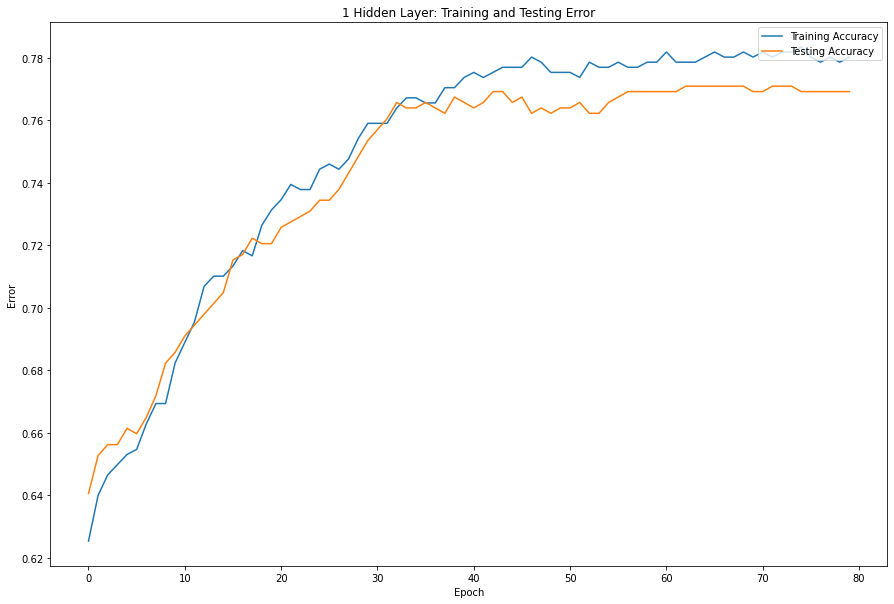

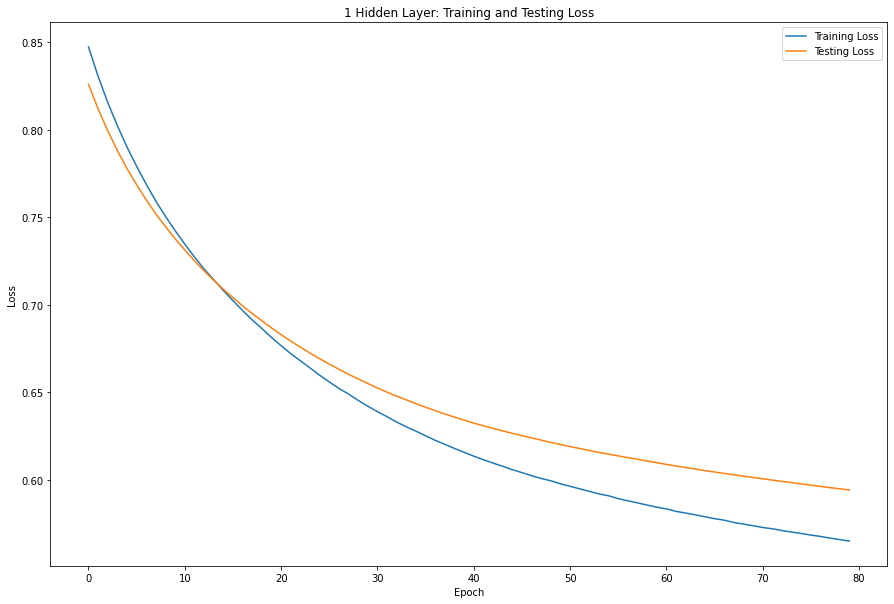

In [18]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1 Hidden Layer: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('1 Hidden Layer: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()